<h2 style="text-align: left; color: SlateGray;\" markdown="3">Pós-Graduação em Sensoriamento Remoto (Mestrado)<br>
SER-347 - Introdução à Programação para Sensoriamento Remoto<br>
Trabalho de Conclusão de Disciplina</h2>
<hr style=\"border:2px solid #0077b9;\">
<h2 style="text-align: center; font-variant: small-caps;">Análise da variabilidade espaço-temporal do fenômeno de ilhas
de calor urbano na cidade de Fortaleza/CE</h2>

<p style="text-align: center;">Marcelo Cardoso da Silva Bandoria¹, Rafael Duarte Viana¹</p>

<p style="text-align: center;">¹Instituto Nacional de Pesquisas Espaciais - INPE<br/>
Caixa Postal 515 - 12227-010 - São José dos Campos - SP, Brasil<br/>
{marcelo.bandoria,rafael.viana}@inpe.br</p>

### 1. INTRODUÇÃO
<p style="text-align: justify;">Nas últimas décadas, o rápido crescimento das cidades, em diversas escalas trouxeram efeitos adversos ao ambiente como um todo, sobretudo ao microclima, e diversas consequências e efeitos diretos na saúde, podem estar associados também a essa variação, afetando a população que vive em áreas densamente povoadas. Dentre tantos problemas, destacamos o chamado efeito de “ilha de calor urbana” (UHI – Urban Heat Islands Effects), que pode ser descrito como um fenômeno em que as temperaturas nas áreas urbanas são mais altas do que nas áreas rurais próximas.</p>
<p style="text-align: justify;">&nbsp;&nbsp;&nbsp;&nbsp;A possibilidade de estudar tal fenômeno baseado em sensoriamento remoto revelou bons resultados pois as “ilhas de calor” (UHI) que possui propriedades diurnas e sazonais evidentes, assim baseado em temperaturas de superfície terrestre (LST – Land Surface Temperature) derivados de dados NOAA AVHRR, Streutker (2002) e recentemente MODIS, descobriu-se que o a magnitude do (UHI) noturno no Texas, Houston, foi correlacionada com a temperatura da superfície rural (RST). (Ji Zhou, et.al, 2010) ; (LI et al., 2018).</p>
<p style="text-align: justify;">&nbsp;&nbsp;&nbsp;&nbsp;No entanto, diferenças nos resultados, foram apontadas quando o número de imagens foi aumentado nas análises. Dessa forma surge a necessidade de se utilizar grandes quantidades de informações espaço-temporais para verificar a distribuição da temperatura na superfície e seu comportamento durante certo intervalo de tempo para atender a distribuição e comportamento da temperatura, associada a áreas de vegetação, para o planejamento urbano e o desenvolvimento administrativo dos recursos naturais e sociais da população.</p>
<p style="text-align: justify;">&nbsp;&nbsp;&nbsp;&nbsp;Diante disso o objetivo deste trabalho é apoiado na linguagem de programação Python e ferramentas associadas de computação, iniciar um levantamento no processo de investigação das relações entre o índice de ilhas de calor (UHI) e seu comportamento na área metropolitana de Fortaleza – CE, por meio da obtenção de dados do sensor (MODIS –  Moderate Resolution Imaging Spectroradiometer) desenvolvido pela NASA  abordo dos satélites AQUA e TERRA. Na discussão da literatura foi visto que sua capacidade de resolução e associada a necessidade de obtermos dados diários, melhora significativamente a investição do fenômeno, por meio da correlação da temperatura de áreas urbanas e rurais, derivadas da série temporal Terra/Aqua MODIS data durante o período de 2003 até 2012, correlacionando dados de diuturnamente e comparando-os para obtenção da variação do efeito da ilha de calor. Sabemos que as dificuldades em realizar estudos temporais em SIG’s limitam a obtenção de resultados, desta forma a utilização de Python representa uma saída possível para gerenciar e agilizar a organização dos dados e obtenção de resultados. </p>
<p style="text-align: justify;">&nbsp;&nbsp;&nbsp;&nbsp;Em diversos estudos evidencia-se que obter a variação sazonal desse parâmetro de temperatura, cruzando com dados de vegetação em escala adequada pode ser uma ferramenta poderosa para a tomada de decisão no desenvolvimento territorial, podendo ser referência para políticas públicas e de administração de governos municipais e estaduais em diversas cidades, portanto, os resultados servem para a tomada de decisão e afeta diretamente na vida da população em diversos aspectos da saúde e qualidade de vida em geral.<p>


### 2. DADOS E MÉTODOS

<p style="text-align: justify;">&nbsp;&nbsp;&nbsp;&nbsp;Para a realização do trabalho, foram utilizados os pacotes indicados na Tabela 1.<p>

<table>
     <caption  style="text-align: center;">Tabela 1: Módulos Python utilizados no programa</caption>
    <thead>
        <tr>
            <th style="text-align: center;">Tipo da Biblioteca</th>
            <th style="text-align: center;">Sist. Oper.</th>
            <th style="text-align: center;">Numérica</th>
            <th style="text-align: center;">Espaciais</th>            
            <th style="text-align: center;">Gráficas</th>            
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style="text-align: center;">Nome do Pacote</td>
            <td style="text-align: center;">os<br />calendar</td>
            <td style="text-align: center;">Numpy<br />Pandas<br />SciPy</td>
            <td style="text-align: center;">GDAL<br />PyPROJ<br />Fiona</td>
            <td style="text-align: center;">MatPlotLib<br />descartes</td>
        </tr>
    </tbody>
</table>
</span>

In [1]:
"""-------------------------------------------------------------
    IMPORTAÇÃO DE BIBLIOTECAS
-------------------------------------------------------------"""
# Bibliotecas OS
import os
import calendar

# Bibliotecas Numéricas
import numpy as np
import pandas as pd
from collections import OrderedDict
from scipy.ndimage import zoom

# Bibliotecas Geográficas
from osgeo import gdal
from pyproj import Proj, transform
import fiona

# Bibliotecas Gráficas
import matplotlib.pyplot as plt
from descartes import PolygonPatch

O instrumento MODIS está a bordo dos satélites Aqua e Terra. O satélite Terra adquire imagens às 10:30 e 22:30h no horário solar local, enquanto o satélite Aqua adquire imagens às 1:30 e 13:30h. Para este estudo, foram utilizados os produtos de 8-dias de LST/emissividade do MODIS Terra/Aqua (MOD11A2 e MYD11A2, respectivamente) nas versões V006 durante o período entre 2003-2012 para caracterizar a SHUIs. A resolução da LST é de 1000m.

In [1]:
"""-------------------------------------------------------------
    CONFIGURAÇÃO DO RECORTE TEMPORAL
-------------------------------------------------------------"""
# Configuração do período temporal da análise
# Para ilustração, será usado o mês 09/2003
ano_inicio  = 2003
ano_final   = 2003
mes_inicio  = 9
mes_final   = 9

Descrição da área de trabalho

In [3]:
"""-------------------------------------------------------------
    CONFIGURAÇÃO DO RECORTE ESPACIAL
-------------------------------------------------------------"""
# Configuração do recorte espacial da análise
lat_max = -3.6
lat_min = lat_max - 0.4
lon_min = -38.75
lon_max = lon_min + 0.4

### 3. Área de Estudo

<p style="text-align: justify;"> A cidade de Fortaleza no Ceará, está na região do nordeste brasileiro e possui clima tropical, com verão úmido e inverno seco. A classificação do clima é Aw de acordo com a Köppen e Geiger. A temperatura média anual em Fortaleza é 26.3 °C,e  pluviosidade média anual de 1448 mm. No mês de Novembro há o registro do mês mais quente do ano e Julho é o mês com a mais baixa temperatura ao longo do ano. (https://pt.climate-data.org/location/2031/)</p>


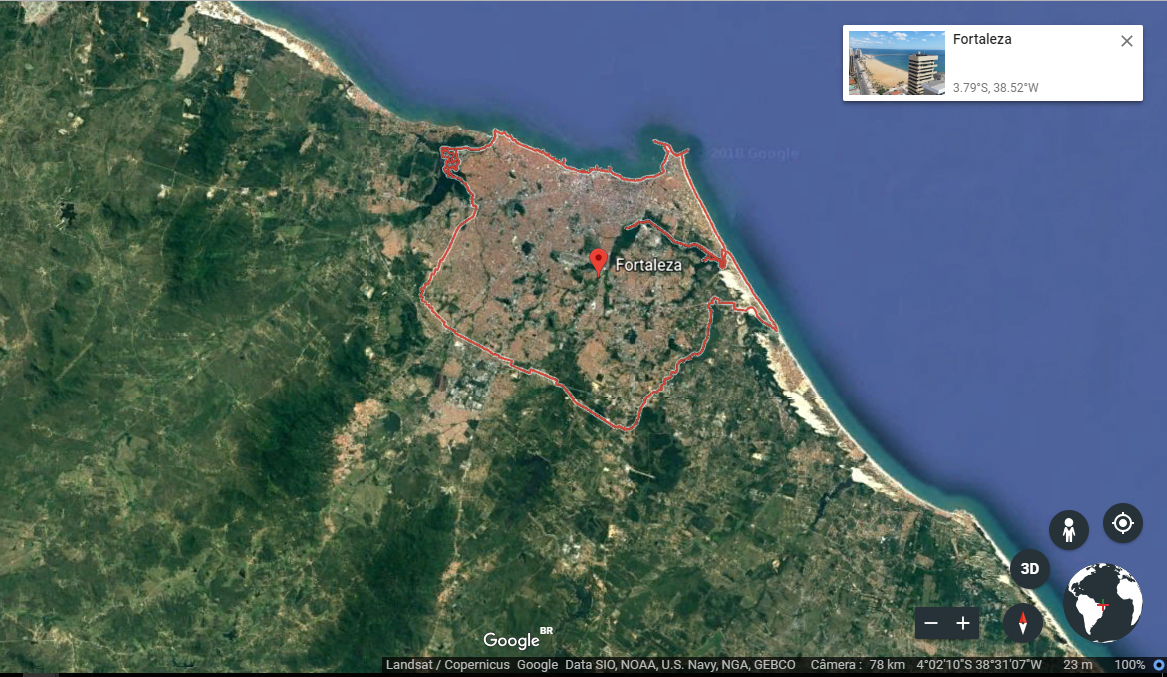



Referências Bibliográficas

Ji, Z., Li, J, Yue, J. Analysis of urban heat island ( UHI ) in the beijing metropolitan area by time-series modis data. p. 3327–3330, 2010. 

Li, H. et al. Science of the Total Environment A new method to quantify surface urban heat island intensity. Science of the Total Environment, v. 624, p. 262–272, 2018. 

Friedl, M. A., and Coauthors, 2002: Global land cover mapping from MODIS: Algorithms and early results. Remote Sens. Environ., 83, 287–302.

Jin, M.S., 2012: Developing an Index to Measure Urban Heat Island Effect Using Satellite Land Skin Temperature and Land Cover Observations. J. Climate, 25, 6193–6201

Rasul, A., Balzter, H. and Smith, C., 2017: Applying a normalized ratio scale technique to assess influences of urban expansion on land surface temperature of the semi-arid city of Erbil,International Journal of Remote Sensing, 38:13, 3960-3980